## This notebook reads the csv file in which i saved my manual measuring of  cell soma size and imports data from automatic layer 5 detection in matlab. 

### In its current state, the matlab automated script is doing a fairly good job though is not perfect, better quality data with maximum intensity projection should hopefully help

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.interpolate import UnivariateSpline
import h5py

sns.set(style='white', font_scale=1.8)
sns.set_palette("colorblind")

%matplotlib inline

In [4]:
def read_csv(csv_path):

    data = []

    with open(csv_path, 'r') as csvfile:
            LUTreader = csv.reader(csvfile, delimiter=',')
            for i,row in enumerate(LUTreader):
                if i > 0:
                    data.append(float(row[6]))

    return np.array(data)

In [5]:
size_path = '/home/jamesrowland/Desktop/soma_size.csv'

sizes = read_csv(size_path)


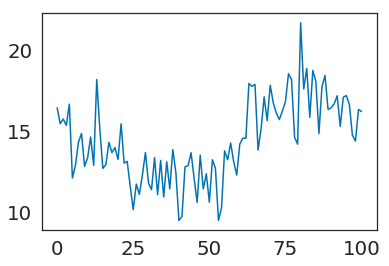

In [6]:
plt.plot(sizes)

In [7]:


#Recorded 1 too many value so correct size by deleting first element
fudge = np.delete(sizes,-1)
reshaped = fudge.reshape(int(len(fudge)/4),4)
reshaped.shape

(25, 4)

In [8]:
mean_size = np.mean(reshaped,1)
mean_size.shape

(25,)

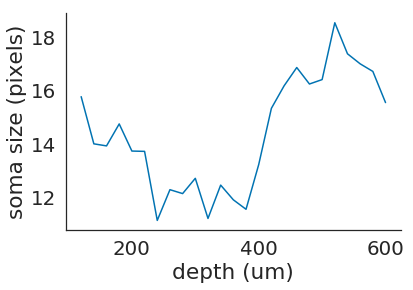

In [9]:
# the last slice is 31
# the first slice should be 6
# the step size is 20 um

x_axis = np.arange(20*6,20*31,20)

plt.plot(x_axis,mean_size)
plt.xlabel('depth (um)')
plt.ylabel('soma size (pixels)')
sns.despine()

In [23]:
## import the data from matlabs auto layer 5 detector

mat_path = '/home/jamesrowland/Documents/Code/slice_size.mat'
with h5py.File(mat_path, 'r') as f:
    for k, v in f.items():
        size_auto = np.array(v).squeeze()


In [26]:
# I saved the missing values as 0 in matlab to make the import easier
size_auto = [np.nan if i == 0 else i for i in size_auto]

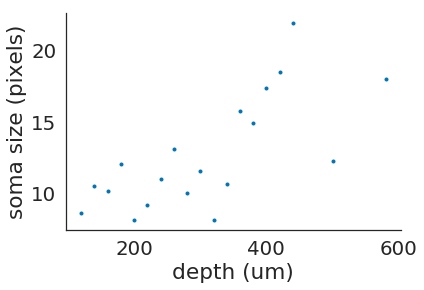

In [34]:
# need to plot as scatter due to NaNs

x_axis = np.arange(20,740,20)
plt.plot(x_axis, size_auto, '.')
plt.xlabel('depth (um)')
plt.ylabel('soma size (pixels)')
sns.despine()